<a href="https://colab.research.google.com/github/g1uLiax/uek259-ai/blob/main/05_supervisedml_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Machine Learning, Clustering


### K-Nearest Neighbour
Implement the K Nearest Neighbour (KNN) Algorithm for the blob dataset of the previous exercise

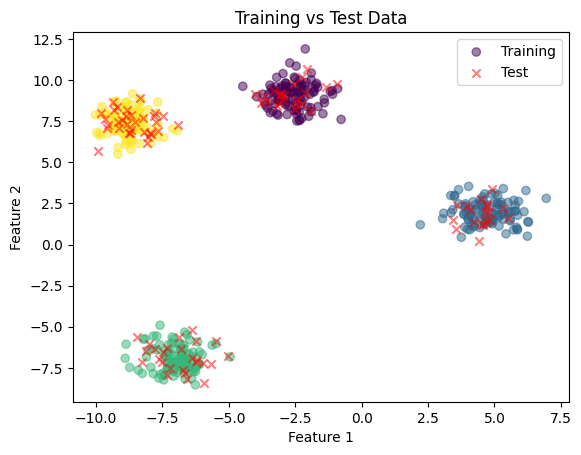

In [106]:
#Get a Dataset to use as experience data
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import math

data, labels = make_blobs(
n_samples=500,
centers=4,
cluster_std=0.75,
random_state=42)


#Split your data into training and test data
experienceData,testData, experienceLabels, testLabels = train_test_split(data,labels, test_size=0.20)
len(experienceLabels)


# Plot training data
plt.scatter(experienceData[:, 0], experienceData[:, 1], marker='o', c=experienceLabels, alpha=0.5, label='Training')

# Plot test data
plt.scatter(testData[:, 0], testData[:, 1], marker='x', c='red', label='Test', alpha=0.5)

plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training vs Test Data')
plt.show()

[1 1 1 1 1]
[ 8.71304841 -3.83479341] 1


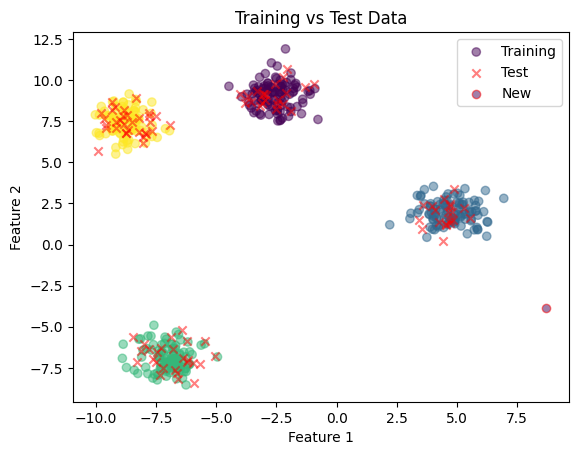

In [125]:
# 1. Find the Euclidean distance to all experience data points
# 2. get the k closest points
# 3. Return the predicted class of the new point based on
# the majority classes of the chosen points (in 3.)


def k_nearest(newPoint, experienceData, experienceLabels, k):
  distance_p = ([])
  for idx in range(len(experienceData)):
    distance_p.append(math.dist(newPoint, experienceData[idx]))
  nearest_i = np.argsort(distance_p)[:k] # get indices of k smallest dist
  labels = experienceLabels[nearest_i]
  print(labels)
  return np.bincount(labels).argmax()

new_point = np.random.uniform(np.min(experienceData), np.max(experienceData), size=2)
nearest_label = k_nearest(new_point, experienceData, experienceLabels, 5)
print(new_point, nearest_label)


plt.scatter(experienceData[:, 0], experienceData[:, 1], marker='o', c=experienceLabels, alpha=0.5, label='Training')
plt.scatter(testData[:, 0], testData[:, 1], marker='x', c='red', label='Test', alpha=0.5)
plt.scatter(new_point[0], new_point[1], c=nearest_label, marker='o', alpha=0.5, label='New', edgecolors='red')

plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training vs Test Data')
plt.show()

## Bonus Task:

Visualize the **training** and **test** data separately as a scatterplot and include your classifier as a line in the plot.

# Support Vector Machines
SVM is a supervised learning algorithm used for classification and regression. It finds the best boundary (hyperplane) that separates classes with the maximum margin.
They are widely used in classifacation tasks and work well for high dimensional datasets.


This example uses The [Wisconsin Breast cancer dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-wisconsin-diagnostic-dataset)




[Documentation](https://scikit-learn.org/stable/modules/svm.html)

In [109]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import pandas as pd
cancer=datasets.load_breast_cancer(as_frame=True)

X = cancer.data
y = cancer.target

# print the cancer data features (top 5 records)
X.describe()
# print the cancer labels (0:malignant, 1:benign
print(y.value_counts())

target
1    357
0    212
Name: count, dtype: int64


* kernel='linear' is good for linearly separable data.

* You can change the kernel to 'rbf', 'poly', etc. for more complex boundaries.


In [110]:
from sklearn.model_selection import train_test_split

#split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

#train the SVC classifier
clf = svm.SVC(kernel= "linear")
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [111]:
#predict labels on the test data using our classifier
y_pred = clf.predict(X_test)
print(y_pred)

[1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0
 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0
 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1
 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1]


In [112]:
from sklearn.metrics import classification_report, confusion_matrix

#compare our predictions to the true labels
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Confusion Matrix:
 [[52  1]
 [ 1 89]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.99      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



SVC(kernel='linear', random_state=32)

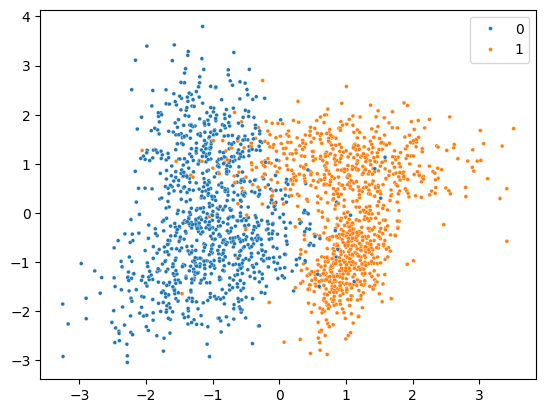

In [118]:
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_classification
import seaborn as sns

# Creating a random dataset of 2,000 samples and only 2 features
# (for 2–dimensional space). And yeah, it's a binary classification
# here (`y` contains two classes: 0 and 1).
X, y = make_classification(n_samples=2000, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_classes=2,
                           random_state=32)
sns.scatterplot(x=X[:, 0],
                y=X[:, 1],
                hue=y,
                s=8);
# Splitting our dataset by train and test parts.
# `stratify` is here to make our splitting balanced
# in terms of classes.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   test_size=0.3, stratify=y,
                                   random_state=32)
# And here we train our model. IMPORTANT: we use kernel='linear'.
svc_model = SVC(kernel='linear', random_state=32)
svc_model.fit(X_train, y_train)

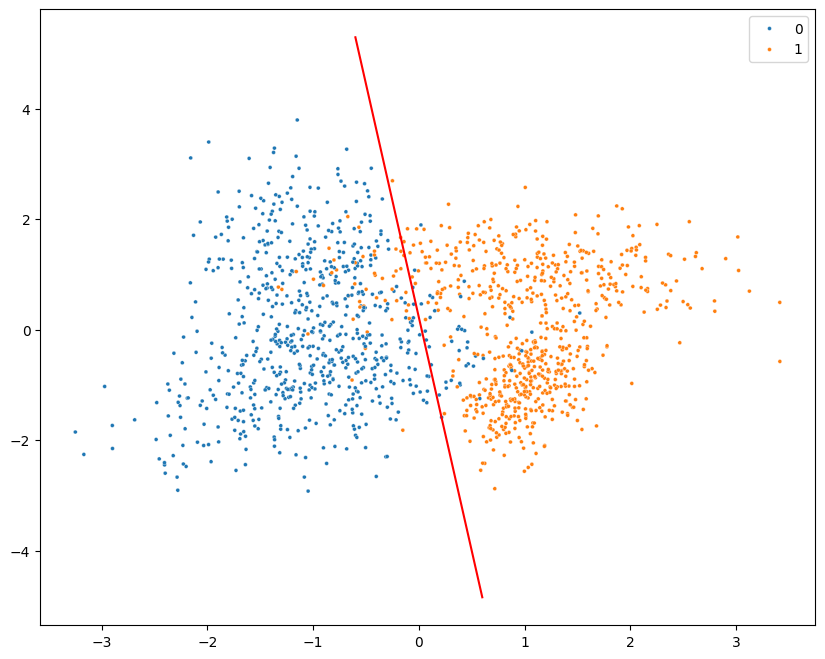

In [119]:
svc_model.fit(X_train, y_train)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X_train[:, 0],
                y=X_train[:, 1],
                hue=y_train,
                s=8);
# Constructing a hyperplane using a formula.
w = svc_model.coef_[0]  # w consists of 2 elements
b = svc_model.intercept_[0]  # b consists of 1 element
x_points = np.linspace(-0.6, 0.6)  # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');